In [1]:
import numpy as np
import dolfin as dl
import matplotlib.pyplot as plt

/Users/afzal-admin/opt/anaconda3/envs/fenics_environment/lib/python3.9/site-packages/dolfin/jit/jit.py:121: RuntimeWarning: mpi4py.MPI.Status size changed, may indicate binary incompatibility. Expected 40 from C header, got 48 from PyObject
  def compile_class(cpp_data, mpi_comm=MPI.comm_world):
/Users/afzal-admin/opt/anaconda3/envs/fenics_environment/lib/python3.9/site-packages/dolfin/jit/jit.py:121: RuntimeWarning: mpi4py.MPI.Datatype size changed, may indicate binary incompatibility. Expected 24 from C header, got 32 from PyObject
  def compile_class(cpp_data, mpi_comm=MPI.comm_world):
/Users/afzal-admin/opt/anaconda3/envs/fenics_environment/lib/python3.9/site-packages/dolfin/jit/jit.py:121: RuntimeWarning: mpi4py.MPI.Request size changed, may indicate binary incompatibility. Expected 32 from C header, got 40 from PyObject
  def compile_class(cpp_data, mpi_comm=MPI.comm_world):
/Users/afzal-admin/opt/anaconda3/envs/fenics_environment/lib/python3.9/site-packages/dolfin/jit/jit.py:121

In [2]:
mesh = dl.UnitSquareMesh(2,1)

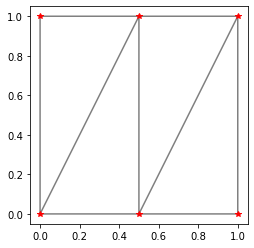

In [3]:
dl.plot(mesh)
plt.plot(mesh.coordinates()[:,0], mesh.coordinates()[:,1], '*r')

In [4]:
mesh.coordinates()

array([[0. , 0. ],
       [0.5, 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 1. ],
       [1. , 1. ]])

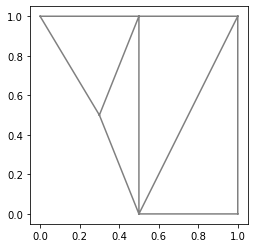

In [5]:
mesh.coordinates()[0,:] = np.array([0.3, 0.5])
dl.plot(mesh)

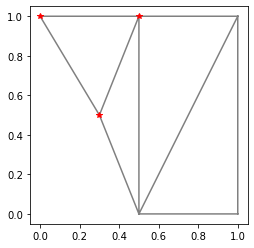

In [6]:
mesh.cells()
dl.plot(mesh)
plt.plot(mesh.coordinates()[mesh.cells()[1,:],0], mesh.coordinates()[mesh.cells()[1,:],1], '*r')

In [7]:
Vh = dl.FunctionSpace(mesh, 'CG', 1)
Vh.dim()

/Users/afzal-admin/opt/anaconda3/envs/fenics_environment/lib/python3.9/site-packages/dolfin/jit/jit.py:46: RuntimeWarning: mpi4py.MPI.Status size changed, may indicate binary incompatibility. Expected 40 from C header, got 48 from PyObject
  if MPI.size(mpi_comm) == 1:
/Users/afzal-admin/opt/anaconda3/envs/fenics_environment/lib/python3.9/site-packages/dolfin/jit/jit.py:46: RuntimeWarning: mpi4py.MPI.Datatype size changed, may indicate binary incompatibility. Expected 24 from C header, got 32 from PyObject
  if MPI.size(mpi_comm) == 1:
/Users/afzal-admin/opt/anaconda3/envs/fenics_environment/lib/python3.9/site-packages/dolfin/jit/jit.py:46: RuntimeWarning: mpi4py.MPI.Request size changed, may indicate binary incompatibility. Expected 32 from C header, got 40 from PyObject
  if MPI.size(mpi_comm) == 1:
/Users/afzal-admin/opt/anaconda3/envs/fenics_environment/lib/python3.9/site-packages/dolfin/jit/jit.py:46: RuntimeWarning: mpi4py.MPI.Prequest size changed, may indicate binary incompatib

6

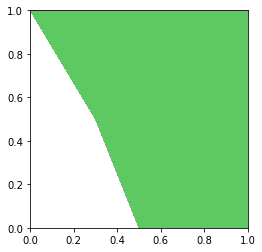

In [8]:
f = dl.Function(Vh)
dl.plot(f)

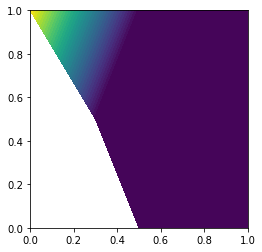

In [9]:
f.vector()[0] = 1.
dl.plot(f)

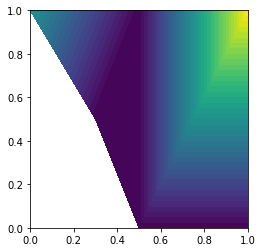

In [10]:
f.vector()[4] = 2.
dl.plot(f)

In [11]:
f.vector()[:]

array([1., 0., 0., 0., 2., 0.])

In [12]:
f(0.3, 1.0)

0.40000000000000013

In [13]:
f(0.9, 0.9)

1.6

In [14]:
Vh.tabulate_dof_coordinates()

array([[0. , 1. ],
       [0.3, 0.5],
       [0.5, 1. ],
       [0.5, 0. ],
       [1. , 1. ],
       [1. , 0. ]])

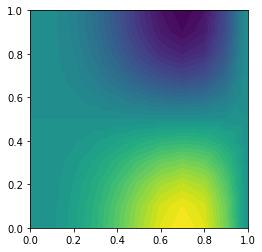

In [15]:
mesh = dl.UnitSquareMesh(10,10)
Vh = dl.FunctionSpace(mesh, 'CG', 1) # Continuous piecewise linear
# V = dl.FunctionSpace(mesh, 'CG', 2) # higher order CG element (quadratic)

E = dl.Expression('sin(pi*pow(x[0],2))*cos(pi*x[1])', degree=3)
dl.plot(E, mesh=mesh)

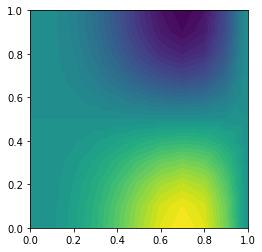

In [16]:
E_function = dl.interpolate(E, Vh)

dl.plot(E_function)

In [17]:
E(0.5, 0.6)

-0.21850801222441046

In [18]:
E.vector()[:]

AttributeError: 

# Solving poisson PDE

We want to solve 

$$\Delta u = f \quad \text{in   } \Omega$$

where $\Omega = [0,1]$. With B.C.'s $u(0) = 2.5$ and $u(1)=23$

In [ ]:
mesh = dl.UnitIntervalMesh(5)
dl.plot(mesh)

In [ ]:
Vh = dl.FunctionSpace(mesh, 'CG', 1)
f = dl.Function(Vh)
f.vector()[0] = 2.
f.vector()[3] = -1
dl.plot(f)

weak form

$$\int_\Omega \nabla u \cdot \nabla \hat{u} dx$$

In [ ]:
stiffness_form = dl.inner(dl.grad(dl.TrialFunction(Vh)), dl.grad(dl.TestFunction(Vh))) * dl.dx

In [ ]:
print(stiffness_form)

$$K_{ij} = \int_\Omega \nabla \phi_i \cdot \nabla \phi_j dx$$

In [ ]:
K = dl.assemble(stiffness_form)
K.array()

$$Ku=b$$

$$b_i = \int_\Omega f \phi_i dx$$

In [ ]:
rhs_form = f * dl.TestFunction(Vh) * dl.dx
print(rhs_form)

In [ ]:
f

In [ ]:
b = dl.assemble(rhs_form)
b[:]

In [ ]:
def left_boundary(x, on_boundary):
    if (x[0] == 0) and on_boundary:
        return True
    else:
        return False

def right_boundary(x, on_boundary):
    if (x[0] == 1) and on_boundary:
        return True
    else:
        return False

bc_left = dl.DirichletBC(Vh, dl.Constant(2.5), left_boundary)
bc_right = dl.DirichletBC(Vh, dl.Constant(23), right_boundary)

In [ ]:
b[:]

In [ ]:
bc_left.apply(b)
b[:]

In [ ]:
bc_right.apply(b)
b[:]

In [ ]:
K.array()

In [ ]:
bc_left.apply(K)
K.array()

In [ ]:
bc_right.apply(K)
K.array()

In [ ]:
u = dl.Function(Vh)

dl.solve(K, u.vector(), b)

dl.plot(u)

In [ ]:
f.vector()[:] = f.vector()[:] * 100

In [ ]:
f.vector()[:] = 100*np.ones(Vh.dim())

In [ ]:
mesh = dl.UnitIntervalMesh(26)
Vh = dl.FunctionSpace(mesh, 'CG', 2)
# f = dl.Function(Vh)
# f.vector()[:] = 100*np.ones(Vh.dim())
f = dl.Expression('-400*sin(5*pi*x[0])', degree=3)
kappa = dl.Expression('1+pow(x[0], 2)', degree=3)
# kappa = dl.Constant(1.0)

stiffness_form = kappa*dl.inner(dl.grad(dl.TrialFunction(Vh)), dl.grad(dl.TestFunction(Vh))) * dl.dx
rhs_form = f * dl.TestFunction(Vh) * dl.dx

def left_boundary(x, on_boundary):
    if (x[0] == 0) and on_boundary:
        return True
    else:
        return False

def right_boundary(x, on_boundary):
    if (x[0] == 1) and on_boundary:
        return True
    else:
        return False

bc_left = dl.DirichletBC(Vh, dl.Constant(2.5), left_boundary)
bc_right = dl.DirichletBC(Vh, dl.Constant(23), right_boundary)

u = dl.Function(Vh)
K = dl.assemble(stiffness_form)
b = dl.assemble(rhs_form)

bc_left.apply(K)
bc_left.apply(b)

bc_right.apply(K)
bc_right.apply(b)

dl.solve(K, u.vector(), b)
dl.plot(u)

In [ ]:
dl.plot(f)